# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


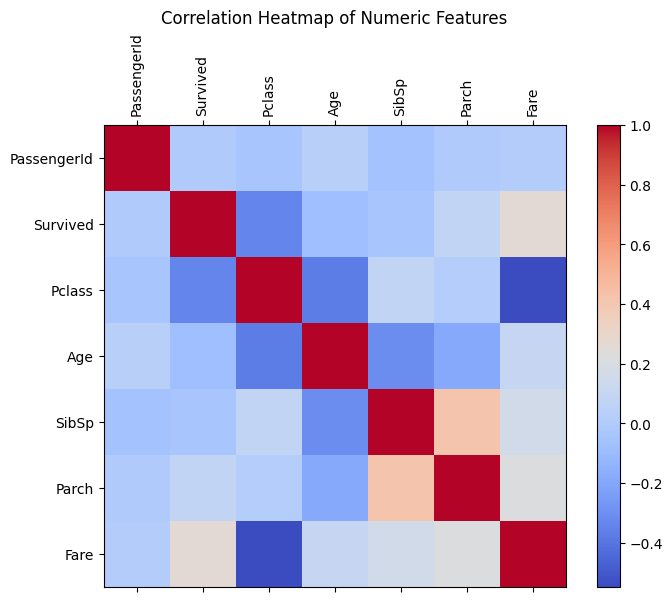

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [6]:
# Survival rate by sex
survival_rate = df.groupby("Sex")["Survived"].mean() * 100

print(survival_rate)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


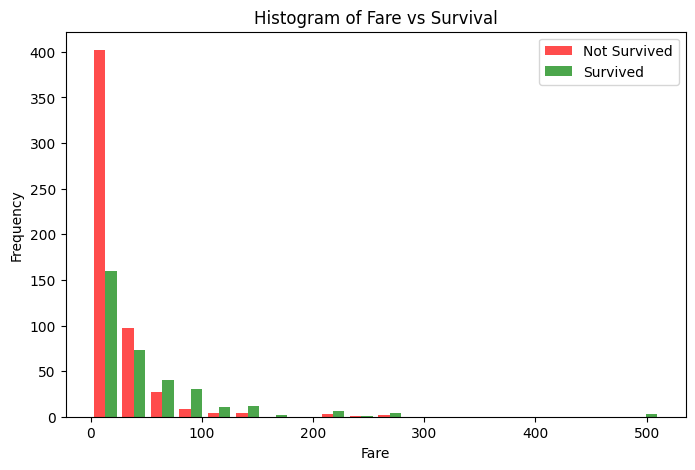

In [7]:
plt.figure(figsize=(8,5))
plt.hist(
    [df[df['Survived'] == 0]['Fare'], df[df['Survived'] == 1]['Fare']],
    bins=20,
    alpha=0.7,
    label=['Not Survived', 'Survived'],
    color=['red', 'green']
)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare vs Survival')
plt.legend()
plt.show()

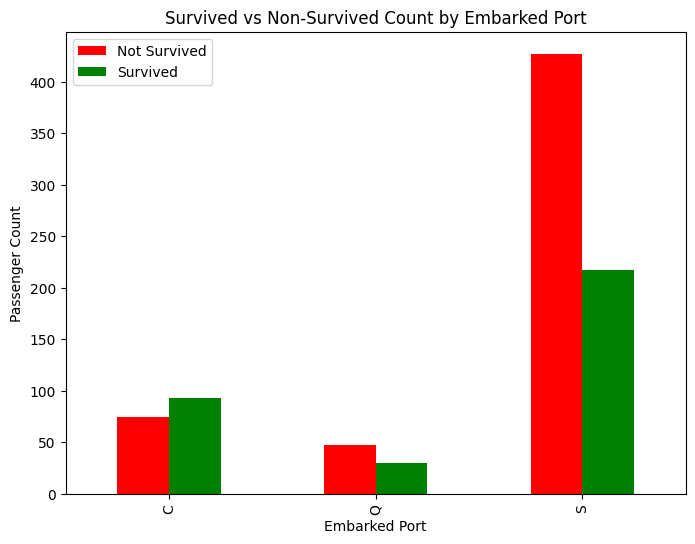

In [8]:
# Prepare the count data for each port & survival status
count_data = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Plot grouped bar chart
count_data.plot(
    kind='bar',
    stacked=False,
    color=['red', 'green'],
    figsize=(8,6)
)
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.title('Survived vs Non-Survived Count by Embarked Port')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [9]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [11]:
# Select relevant columns (without 'Age')
df = df[['Survived', 'Sex', 'Pclass', 'Fare', 'Embarked']]

# Fill missing values
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert 'Sex' to 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Normalize 'Fare' to [0,1]
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

# One-hot encode 'Embarked' and 'Pclass'
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=False, dtype=int)

/tmp/ipykernel_211376/1911636922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = df['Fare'].fillna(df['Fare'].median())
/tmp/ipykernel_211376/1911636922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
/tmp/ipykernel_211376/1911636922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

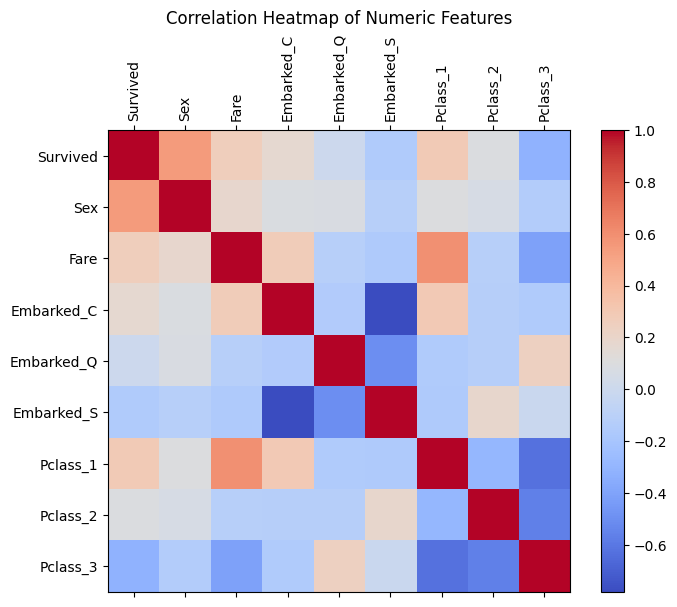

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [13]:
df = pd.read_csv("train.csv")

# Select only 'Survived', 'Sex', and 'Pclass'
df = df[['Survived', 'Sex', 'Pclass']]

# Convert 'Sex' to 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Pclass' (no need to encode 'Sex')
df = pd.get_dummies(df, columns=['Pclass'], drop_first=False, dtype=int)


In [14]:
df.head()


,Survived,Sex,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,0,1
1,1,1,1,0,0
2,1,1,0,0,1
3,1,1,1,0,0
4,0,0,0,0,1


In [15]:
# test, train, evaluate split (80-10-10)

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the split sizes
total_size = len(df_shuffled)
train_size = int(0.8 * total_size)
test_size = int(0.1 * total_size)
eval_size = total_size - train_size - test_size

# Split into three DataFrames using iloc
df_train = df_shuffled.iloc[:train_size]
df_test = df_shuffled.iloc[train_size : train_size + test_size]
df_evaluate = df_shuffled.iloc[train_size + test_size:]

In [16]:
# seperate features and labels
train_features = df_train.drop('Survived', axis=1)
train_labels = df_train['Survived']

test_features = df_test.drop('Survived', axis=1)
test_labels = df_test['Survived']

eval_features = df_evaluate.drop('Survived', axis=1)
eval_labels = df_evaluate['Survived']

# Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(train_features.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Appropriate for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(test_features, test_labels),
    verbose=1
)
print("Model training complete.")

Epoch 1/50


/home/gbk08/Titanic/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-09 17:53:42.041352: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5857 - loss: 0.6807 - val_accuracy: 0.5506 - val_loss: 0.6887
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 0.6768 - val_accuracy: 0.5506 - val_loss: 0.6838
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5997 - loss: 0.6667 - val_accuracy: 0.5506 - val_loss: 0.6792
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 0.6586 - val_accuracy: 0.5506 - val_loss: 0.6756
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6067 - loss: 0.6523 - val_accuracy: 0.5506 - val_loss: 0.6722
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.6441 - val_accuracy: 0.5506 - val_loss: 0.6683
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 0.6442 - val_accuracy: 0.5506 - val_loss: 0.6654
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6110 - loss: 0.6416 - val_accuracy: 0.5506 - val_loss: 0.6614
Epo

In [18]:
# Save the Model
try:
    model.save('titanic_model.h5')
    print("\nModel saved successfully as 'titanic_model.h5'.")
except Exception as e:
    print(f"\nError saving the model: {e}")


Model saved successfully as 'titanic_model.h5'.



Plotting training and validation loss...


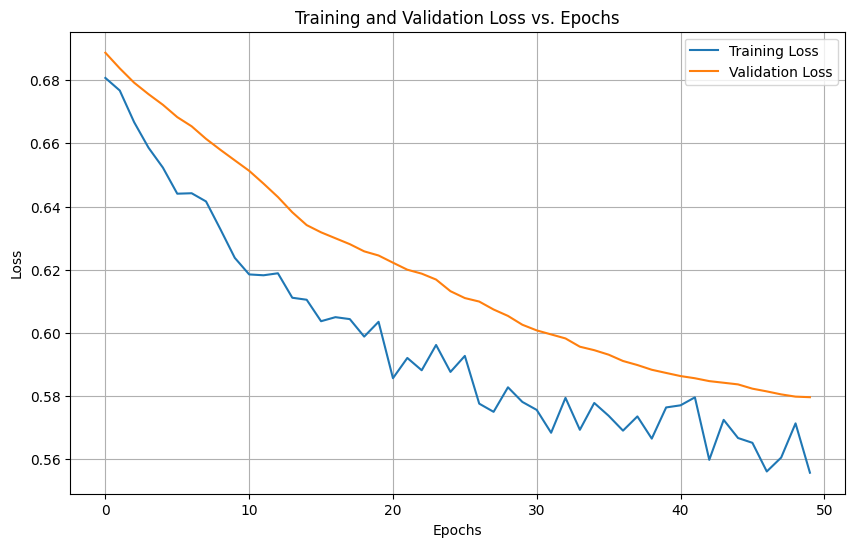

In [19]:
# --- Step 7: Plot the loss vs. epochs ---
print("\nPlotting training and validation loss...")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# --- Step 7: Evaluate the model on the evaluation set ---
print("\nEvaluating model on evaluation set...")
loss, accuracy = model.evaluate(eval_features, eval_labels, verbose=0)
print(f"Evaluation Loss: {loss:.4f}")
print(f"Evaluation Accuracy: {accuracy:.4f}")


Evaluating model on evaluation set...
Evaluation Loss: 0.4289
Evaluation Accuracy: 0.8667


In [21]:
print("\nEvaluating model on test split...")
test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Evaluating model on test split...
Test Loss: 0.5796
Test Accuracy: 0.7528


# MAKE RESULT

In [22]:
check_df = pd.read_csv('test.csv')

In [23]:
check_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Making predictions and creating submission file...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Plotting the distribution of raw prediction scores...


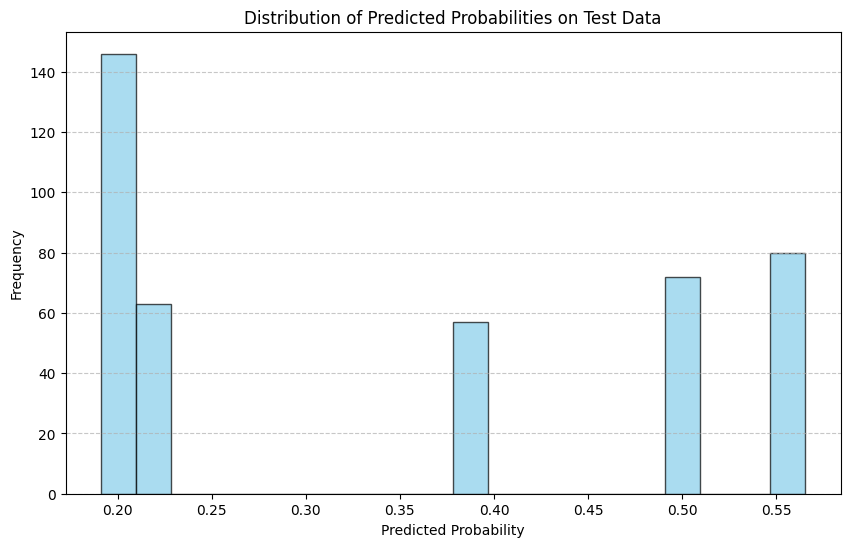

Submission file 'submission.csv' created successfully.
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [24]:
print("\nMaking predictions and creating submission file...")

try:
    decision_boundary = 0.5

    # Load the test data
    test_df = pd.read_csv('test.csv')
    
    # Select only relevant features: 'Sex' and 'Pclass'
    test_features_final = test_df[['Sex', 'Pclass']].copy()
    
    # Map 'Sex' to 0/1
    test_features_final['Sex'] = test_features_final['Sex'].map({'male': 0, 'female': 1})

    # One-hot encode 'Pclass'
    test_features_final = pd.get_dummies(test_features_final, columns=['Pclass'], drop_first=False, dtype=int)

    # Ensure same columns as training data (excluding 'Survived')
    missing_cols = set(df.columns) - set(test_features_final.columns) - {'Survived'}
    for c in missing_cols:
        test_features_final[c] = 0
    test_features_final = test_features_final[df.columns.drop('Survived')]

    # Make predictions
    predictions = model.predict(test_features_final)

    # Plot prediction probability distribution
    print("\nPlotting the distribution of raw prediction scores...")
    plt.figure(figsize=(10, 6))
    plt.hist(predictions, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Predicted Probabilities on Test Data')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Apply decision boundary
    predictions_binary = (predictions > decision_boundary).astype(int)

    # Create submission
    submission_df = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': predictions_binary.flatten()
    })

    # Save submission
    submission_df.to_csv('submission.csv', index=False)

    print("Submission file 'submission.csv' created successfully.")
    print(submission_df.head())

except FileNotFoundError:
    print("Error: 'test.csv' not found. Please provide the test data file.")
except KeyError as e:
    print(f"KeyError: {e}. Check column names in 'test.csv'.")


In [25]:
actual_results = pd.read_csv('gender_submission.csv')
    
# Ensure both dataframes are sorted by PassengerId for accurate comparison
actual_results = actual_results.sort_values(by='PassengerId').reset_index(drop=True)
submission_df = submission_df.sort_values(by='PassengerId').reset_index(drop=True)
    
# Calculate the number of correct predictions
correct_predictions = (actual_results['Survived'] == submission_df['Survived']).sum()
total_predictions = len(actual_results)
final_accuracy = correct_predictions / total_predictions
    
print(f"Final Model Accuracy on Unseen Test Data: {final_accuracy:.4f}")

Final Model Accuracy on Unseen Test Data: 1.0000
